In [1]:
!pip install pandas numpy opencv-python sklearn seaborn mediapipe

     |████████████████████████████████| 11.5 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 60.3 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 32.7 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 25.9 MB 1.9 MB/s eta 0:00:01     |█████████████████████████████▊  | 24.0 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 39.3 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 66.5 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 1.6 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1308 sha256=fff8f071b200cf3f20a66d4492bcc6ffb0b379daac7a6e72c2ac75b453637766
  Stored in directory: /root/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
You should consider upgradi

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from cv2 import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import  accuracy_score

import sys
import os

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
gloss_df = pd.read_csv("words_dataset.csv")

In [6]:
gloss_df.head()

,WORD,LINK,another meaning
0,Iam,https://www.signingsavvy.com/search/i%2Bam,Me I
1,you,https://www.signingsavvy.com/sign/YOU/500/1,HE HER HIM IT SHE YOU YOU ARE
2,sorry,https://www.signingsavvy.com/sign/SORRY/403/1,APOLOGIZE APOLOGY ATONE ATONEMENT CONTRITION ...
3,understand,https://www.signingsavvy.com/search/understand,COMPREHEND ENLIGHTEN EPIPHANY EUREKA MAKE SE...
4,okay,https://www.signingsavvy.com/sign/OK/303/2,NaN


In [8]:
gloss_df['num'] = gloss_df.apply(lambda row: row.index)
label_map = gloss_df.set_index("WORD").iloc[:, 2].to_dict()
label_map

{'Iam': 0,
 'you': 1,
 'sorry': 2,
 'understand': 3,
 'okay': 4,
 'Good': 5,
 'morning': 6,
 'help': 7,
 'Nice': 8,
 'meet': 9,
 'yes': 10,
 'no': 11,
 'hello': 12,
 'Excuse': 13,
 'love': 14,
 'egypt': 15,
 'hate': 16,
 'have': 17,
 'car': 18,
 'fun': 19,
 'take': 20,
 'picture': 21,
 'holiday': 22,
 'Enjoy': 23,
 'time': 24,
 'not': 25,
 'every': 26,
 'day': 27,
 'my': 28,
 'your': 29,
 'when': 30,
 'where': 31,
 'what': 32,
 'name': 33,
 'age': 34,
 'thanks': 35,
 'Forget': 36,
 'speak': 37,
 'English': 38,
 'call': 39,
 'number': 40,
 'sport': 41,
 'football ': 42,
 'run': 43,
 'book': 44,
 'read': 45,
 'play': 46,
 'ride': 47,
 'today': 48,
 'month': 49,
 'year': 50,
 'na': 51}

In [7]:
def read_video_frames(path):
    frames_files_list =  os.listdir(path)
    frames = []
    for frame in frames_files_list:
        frame_np = np.load(os.path.join(path, frame))
        frames.append(frame_np)
#     if len(frames) < 233:
#         empty_frame = np.zeros(1662)
#         empty_frame_list = [empty_frame] * (233 - len(frames))
#         frames.extend(empty_frame_list)
        
    return np.array(frames)

In [8]:
def _frames_feature(frames):
    frames_list = []
    for frame in frames:
        frames_list.append(tf.train.Feature(float_list=tf.train.FloatList(value=frame)))
    return tf.train.FeatureList(feature=frames_list)

In [9]:
def _label_feature(label):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[label]))

In [10]:
def create_dataset_records(word, num_of_videos):
    frames_num_list = []
    print(f"collecting {word} directory contains ({num_of_videos}) Video.")
    for i in range(num_of_videos):
        video = read_video_frames(os.path.join("keypoints", word, str(i)))
        print(f"\tcollecting video number ({i}) directory with ({len(video)}) frames.")
        feature_ex = {
            "video_frames": _frames_feature(video),
        }
        label_ex = {
            "label": _label_feature(label_map[word])
        }
        video = tf.train.FeatureLists(feature_list=feature_ex)
        label = tf.train.Features(feature = label_ex)
        example = tf.train.SequenceExample(context=label, feature_lists=video)
        writer.write(example.SerializeToString())

In [11]:
gloss_df['videos_ids'].values[0].strip('][').split(', ')

NameError: name 'gloss_df' is not defined

In [68]:
writer = tf.io.TFRecordWriter("dataset.tfrecords")
gloss_df.apply(lambda row: create_dataset_records(row['gloss'], len(row['videos_ids'].strip('][').split(', '))), axis=1)
writer.close()
sys.stdout.flush()

collecting book directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting drink directory contains (15) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
	collecting video number (9) directo

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
collecting help directory contains (14) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
	collecting video number 

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
	collecting video number (9) directory with (233) frames.
collecting many directory contains (10) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number 

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
	collecting video number (9) directory with (233) frames.
	collecting video number (10) directory with (233) frames.
collecting family directory contains (11) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video numb

	collecting video number (10) directory with (233) frames.
	collecting video number (11) directory with (233) frames.
	collecting video number (12) directory with (233) frames.
collecting white directory contains (10) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
	collecting video number (9) directory with (233) frames.
collecting wrong directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) dir

collecting enjoy directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting forget directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting give directory contains 

	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
	collecting video number (9) directory with (233) frames.
collecting africa directory contains (9) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
collecting basketball directory contains (12) Video.
	collecting video number (0) 

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting paint directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting paper directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directo

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting bar directory contains (11) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
	collecting video number (9) directory with (233) frames.
	collecting video number (

	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
	collecting video number (9) directory with (233) frames.
	collecting video number (10) directory with (233) frames.
collecting learn directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting movie directo

	collecting video number (8) directory with (233) frames.
	collecting video number (9) directory with (233) frames.
	collecting video number (10) directory with (233) frames.
collecting with directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting write directory contains (10) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) direct

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting daughter directory contains (10) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
	collecting video number (9) directory with (233) frames.
collecting example directory contains (11) Video.
	collecting video number (0) 

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting person directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting police directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) direc

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting arrive directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting balance directory contains (10) Video.
	collecting video number (0) dir

	collecting video number (9) directory with (233) frames.
collecting country directory contains (9) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
collecting crash directory contains (9) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) direc

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting hope directory contains (9) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
collecting house directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) director

	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
	collecting video number (9) directory with (233) frames.
collecting pants directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting party directory contains (9) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directo

	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting some directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting south directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) director

collecting bake directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting bath directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting behind directory contains (5) Video.
	collecting video number (0) directory with (233

	collecting video number (5) directory with (233) frames.
collecting egg directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting environment directory contains (11) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) di

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting law directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting match directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory

	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting patient directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting pay directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directo

	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
	collecting video number (9) directory with (233) frames.
collecting talk directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting temperature directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) di

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting which directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting win directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory

	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting box directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting bracelet directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) direct

	collecting video number (8) directory with (233) frames.
collecting dive directory contains (9) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
collecting down directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
collecting from directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting get directory contains (7) Video.
	collecting video number (0) directory 

	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting meeting directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting minute directory contains (9) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) dire

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting possible directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting quiet directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) dire

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting stink directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting struggle directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) dire

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
collecting accept directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting adult directo

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting beer directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting belt directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory

	collecting video number (6) directory with (233) frames.
collecting contact directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting continue directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting corner directory contains (5) Video.
	collecting video number (0) directory wi

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting europe directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting event directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) direct

	collecting video number (7) directory with (233) frames.
	collecting video number (8) directory with (233) frames.
collecting grandfather directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting great directory contains (9) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) d

	collecting video number (6) directory with (233) frames.
collecting magazine directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting measure directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting microwave directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory

	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting reason directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting religion directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) dir

	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting story directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting strange directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) direc

	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting university directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting until directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) di

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting arm directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting army directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory 

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting bottle directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting bottom directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) direc

	collecting video number (5) directory with (233) frames.
collecting dollar directory contains (8) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting drawer directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) direc

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting funny directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting garage directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
collecting goal directory contains (7) Video.
	collecting video number (0) directory with (23

	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting insurance directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting island directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting lecture directory contains (7) Video.
	collecting video number (0) directory w

	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting nose directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting often directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) director

	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting rise directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting river directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) director

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting steal directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting stop directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting stupid directory contains 

	collecting video number (5) directory with (233) frames.
collecting wine directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting witness directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting wood directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (23

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting bicycle directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting biology directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) dir

	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting climb directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting command directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting community directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory wi

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting double directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting doubt directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting dumb directory contains 

	collecting video number (4) directory with (233) frames.
collecting fruit directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting function directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting gather directory conta

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting invite directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting israel directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting jesus directory contains (6) Video.
	collecting video number (0) directory with (

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting napkin directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting neck directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directo

	collecting video number (7) directory with (233) frames.
collecting print directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting printer directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting private directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting rooster directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting rude directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting say directory contains (6) Video.
	collecting video number (0) directory with (233

	collecting video number (6) directory with (233) frames.
	collecting video number (7) directory with (233) frames.
collecting square directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting stairs directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting stare directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting thermometer directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting thing directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting third directory contains (7) Video.
	collecting video number (0) directory wi

	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting without directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting wolf directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting worm directory contains 

	collecting video number (2) directory with (233) frames.
collecting brave directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting breathe directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting bright directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with 

	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting commute directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting control directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting count directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting england directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting establish directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting excuse directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory w

	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting gorilla directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting gray directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting guide directory contains (5) Video.
	collecting video number (0) directory with (2

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting key directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting label directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting leaf directory contains (6)

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting october directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting odd directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting offer directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (23

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting realize directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting recognize directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting refuse directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory w

collecting serve directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting seven directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting shampoo directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (

	collecting video number (5) directory with (233) frames.
collecting subway directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting suffer directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting surface directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with

	collecting video number (5) directory with (233) frames.
collecting under directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting verb directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting wall directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233)

collecting afraid directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting against directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting agenda directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting ahead directory contains (4) Vid

	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting battle directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting beginning directory contains (7) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
	collecting video number (6) directory with (233) frames.
collecting belief directory con

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting circle directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting come directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting come here directory conta

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting deposit directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting depressed directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting detach directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory w

collecting everyday directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting expand directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting eye directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting eyes directory contains (5) Video.

	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting grow up directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting gun directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting haircut directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (

collecting knock directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
collecting laptop directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting lift directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (23

collecting organize directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting over directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting owl directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (23

collecting preach directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting preacher directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
collecting prefer directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
collecting pressure directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) 

collecting road directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting robot directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting rubber directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting safe directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting someone directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
collecting song directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting sore throat directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory w

	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting theater directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting them directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting theme directory contains

	collecting video number (5) directory with (233) frames.
collecting whatever directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting within directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting wonder directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory wit

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting attorney directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting audiologist directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting audiology directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) direc

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting buffalo directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting burp directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting bush directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (23

	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
collecting congratulations directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting consider directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting construct directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) d

	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting design directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting detective directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
collecting devil directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory wit

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting enormous directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting eraser directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting every monday directory contains (5) Video.
	collecting video number (0) directo

	collecting video number (3) directory with (233) frames.
collecting geometry directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting get up directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting gift directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with 

	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting iron directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting j directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting jewelry directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) 

	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting mention directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
collecting microscope directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting midnight directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) director

	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting olympics directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
collecting or directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
collecting oral directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting our directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	co

collecting precipitation directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting precise directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting preschool directory contains (3) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
collecting pride directory contains (5) Video.
	collecting video number (0) directory with 

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting recover directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting regular directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting release directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory wi

	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting sixteen directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting ski directory contains (2) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
collecting skip directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233

	collecting video number (5) directory with (233) frames.
collecting t directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting talent directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting telescope directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting tempt directory contains (3) Video.

	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
collecting very directory contains (6) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
	collecting video number (4) directory with (233) frames.
	collecting video number (5) directory with (233) frames.
collecting vice president directory contains (4) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) directory with (233) frames.
	collecting video number (2) directory with (233) frames.
	collecting video number (3) directory with (233) frames.
collecting viewpoint directory contains (5) Video.
	collecting video number (0) directory with (233) frames.
	collecting video number (1) direct

# Train Model

## read labels from dataset

In [33]:
def read_labels(path):
    names_list = os.listdir(path)
    equ_num_list = list(range(len(names_list)))
    num_of_videos_list = []
    
    for i in range(len(names_list)):
        sub_path = os.path.join(path, names_list[i])
        nov = len(os.listdir(sub_path))
        num_of_videos_list.append(nov)
    print(names_list)   
    df = pd.DataFrame(list(zip(names_list, equ_num_list, num_of_videos_list)), columns=['names', 'values', 'num_of_videos'])
    return df.set_index('names').iloc[:, 0].to_dict(), df.set_index('names').iloc[:, 1].to_dict()

In [34]:
read_labels('dataset')

['love', 'forget', 'morning', 'sport', 'hate', 'call', 'holiday', 'hello', 'your', 'where', 'ride', 'month', 'have', 'number', 'speak', 'day', 'understand', 'nice', 'you', 'iam', 'picture', 'good', 'english', 'egypt', 'when', 'play', 'age', 'car', 'my', 'fun', 'na', 'run', 'help', 'excuse', 'meet', 'every', 'year', 'thanks', 'enjoy', 'name', 'read', 'not', 'okay', 'today', 'no', 'book', 'take', 'time', 'yes', 'sorry', 'football', 'what']


({'love': 0,
  'forget': 1,
  'morning': 2,
  'sport': 3,
  'hate': 4,
  'call': 5,
  'holiday': 6,
  'hello': 7,
  'your': 8,
  'where': 9,
  'ride': 10,
  'month': 11,
  'have': 12,
  'number': 13,
  'speak': 14,
  'day': 15,
  'understand': 16,
  'nice': 17,
  'you': 18,
  'iam': 19,
  'picture': 20,
  'good': 21,
  'english': 22,
  'egypt': 23,
  'when': 24,
  'play': 25,
  'age': 26,
  'car': 27,
  'my': 28,
  'fun': 29,
  'na': 30,
  'run': 31,
  'help': 32,
  'excuse': 33,
  'meet': 34,
  'every': 35,
  'year': 36,
  'thanks': 37,
  'enjoy': 38,
  'name': 39,
  'read': 40,
  'not': 41,
  'okay': 42,
  'today': 43,
  'no': 44,
  'book': 45,
  'take': 46,
  'time': 47,
  'yes': 48,
  'sorry': 49,
  'football': 50,
  'what': 51},
 {'love': 53,
  'forget': 61,
  'morning': 74,
  'sport': 57,
  'hate': 54,
  'call': 59,
  'holiday': 54,
  'hello': 62,
  'your': 60,
  'where': 55,
  'ride': 52,
  'month': 57,
  'have': 53,
  'number': 58,
  'speak': 57,
  'day': 54,
  'understand': 88

In [35]:
actions_map, num_of_videos = read_labels('dataset')


['love', 'forget', 'morning', 'sport', 'hate', 'call', 'holiday', 'hello', 'your', 'where', 'ride', 'month', 'have', 'number', 'speak', 'day', 'understand', 'nice', 'you', 'iam', 'picture', 'good', 'english', 'egypt', 'when', 'play', 'age', 'car', 'my', 'fun', 'na', 'run', 'help', 'excuse', 'meet', 'every', 'year', 'thanks', 'enjoy', 'name', 'read', 'not', 'okay', 'today', 'no', 'book', 'take', 'time', 'yes', 'sorry', 'football', 'what']


In [36]:
actions_map

{'love': 0,
 'forget': 1,
 'morning': 2,
 'sport': 3,
 'hate': 4,
 'call': 5,
 'holiday': 6,
 'hello': 7,
 'your': 8,
 'where': 9,
 'ride': 10,
 'month': 11,
 'have': 12,
 'number': 13,
 'speak': 14,
 'day': 15,
 'understand': 16,
 'nice': 17,
 'you': 18,
 'iam': 19,
 'picture': 20,
 'good': 21,
 'english': 22,
 'egypt': 23,
 'when': 24,
 'play': 25,
 'age': 26,
 'car': 27,
 'my': 28,
 'fun': 29,
 'na': 30,
 'run': 31,
 'help': 32,
 'excuse': 33,
 'meet': 34,
 'every': 35,
 'year': 36,
 'thanks': 37,
 'enjoy': 38,
 'name': 39,
 'read': 40,
 'not': 41,
 'okay': 42,
 'today': 43,
 'no': 44,
 'book': 45,
 'take': 46,
 'time': 47,
 'yes': 48,
 'sorry': 49,
 'football': 50,
 'what': 51}

In [37]:
num_of_videos

{'love': 53,
 'forget': 61,
 'morning': 74,
 'sport': 57,
 'hate': 54,
 'call': 59,
 'holiday': 54,
 'hello': 62,
 'your': 60,
 'where': 55,
 'ride': 52,
 'month': 57,
 'have': 53,
 'number': 58,
 'speak': 57,
 'day': 54,
 'understand': 88,
 'nice': 67,
 'you': 72,
 'iam': 56,
 'picture': 57,
 'good': 65,
 'english': 59,
 'egypt': 60,
 'when': 60,
 'play': 54,
 'age': 57,
 'car': 56,
 'my': 57,
 'fun': 62,
 'na': 61,
 'run': 59,
 'help': 66,
 'excuse': 62,
 'meet': 66,
 'every': 59,
 'year': 53,
 'thanks': 60,
 'enjoy': 57,
 'name': 53,
 'read': 62,
 'not': 58,
 'okay': 73,
 'today': 57,
 'no': 66,
 'book': 54,
 'take': 59,
 'time': 57,
 'yes': 66,
 'sorry': 73,
 'football': 53,
 'what': 56}

In [38]:
sequence_length = 40

sequences, labels = [], []
for action in actions_map.keys():
    for sequence in range(num_of_videos[action]):
        window = []
        for frame_num in range(sequence_length):
            frame = np.load(os.path.join("dataset", action, str(sequence),f"frame_{frame_num+1}.npz"))['arr_0']
            window.append(frame)
        sequences.append(window)
        labels.append(actions_map[action])

In [39]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [40]:
X = np.array(sequences)

In [41]:
y = to_categorical(labels).astype(int)

In [42]:
y.shape

(3120, 52)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

In [119]:
sum(y_train)

array([48, 55, 67, 51, 49, 53, 49, 56, 54, 50, 47, 51, 48, 52, 51, 49, 79,
       60, 65, 50, 51, 59, 53, 54, 54, 49, 51, 50, 51, 56, 55, 53, 59, 56,
       59, 53, 48, 54, 51, 48, 56, 52, 66, 51, 59, 49, 53, 51, 59, 66, 48,
       50])

In [120]:
sum(y_test)

array([5, 6, 7, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 9, 7, 7, 6, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 5, 6, 6, 5, 6, 6, 7, 6,
       7, 5, 6, 6, 7, 7, 5, 6])

In [121]:
y_train.shape

(2808, 52)

In [122]:
y_test.shape

(312, 52)

## create network

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [124]:
log_dir = os.path.join("logs")
tb_callback = TensorBoard(log_dir=log_dir)

In [125]:
checkpoint_filepath = 'tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    verbose=1,
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True)

In [126]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(40, 1662)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(len(actions_map.keys()), activation='softmax'))

In [127]:
# Model
dropout = 0.5
nodesizes = [256, 256, 128]

inputs = tf.keras.Input(shape=(40, 1662))

lstm = Bidirectional(LSTM(128, return_sequences=True))(inputs)
lstm = Dropout(rate=dropout)(lstm)  

for i in range(0,3):    #number of layers random between 1 an 3
    lstm = Bidirectional(LSTM(nodesizes[i],return_sequences=True))(lstm)
    lstm = Dropout(rate=dropout)(lstm)

lstm = Bidirectional(LSTM(256))(lstm)
lstm = Dropout(rate=dropout)(lstm)
class_output = Dense(len(actions_map.keys()), activation='softmax', name='class_output')(lstm)

# reject_output = Dense(4, activation='sigmoid', name='reject_output')(lstm)

model = tf.keras.models.Model(inputs=inputs, outputs=class_output)
# Plot the model graph
#keras.utils.plot_model(model, 'nn_graph.png', show_shapes=True)

model.compile(loss={
    'class_output': 'categorical_crossentropy', 
#     'reject_output': 'binary_crossentropy'
    },
    optimizer='Adamax',
    metrics=[tf.keras.metrics.CategoricalAccuracy()])

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 40, 1662)]        0         
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 40, 256)           1833984   
_________________________________________________________________
dropout_20 (Dropout)         (None, 40, 256)           0         
_________________________________________________________________
bidirectional_21 (Bidirectio (None, 40, 512)           1050624   
_________________________________________________________________
dropout_21 (Dropout)         (None, 40, 512)           0         
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 40, 512)           1574912   
_________________________________________________________________
dropout_22 (Dropout)         (None, 40, 512)           0   

In [128]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [129]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 40, 1662)]        0         
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 40, 256)           1833984   
_________________________________________________________________
dropout_20 (Dropout)         (None, 40, 256)           0         
_________________________________________________________________
bidirectional_21 (Bidirectio (None, 40, 512)           1050624   
_________________________________________________________________
dropout_21 (Dropout)         (None, 40, 512)           0         
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 40, 512)           1574912   
_________________________________________________________________
dropout_22 (Dropout)         (None, 40, 512)           0   

In [5]:
!nvidia-smi

Sun Dec 19 08:58:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.86       Driver Version: 470.86       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   55C    P0    12W /  N/A |    549MiB /  5944MiB |     15%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [131]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2000, callbacks=[tb_callback, model_checkpoint_callback])

Epoch 1/2000
88/88 [==============================] - 19s 110ms/step - loss: 4.0105 - categorical_accuracy: 0.0167 - val_loss: 3.9594 - val_categorical_accuracy: 0.0224

Epoch 00001: val_categorical_accuracy improved from -inf to 0.02244, saving model to tmp/checkpoint
Epoch 2/2000
88/88 [==============================] - 4s 40ms/step - loss: 3.9412 - categorical_accuracy: 0.0303 - val_loss: 3.7292 - val_categorical_accuracy: 0.0641

Epoch 00002: val_categorical_accuracy improved from 0.02244 to 0.06410, saving model to tmp/checkpoint
Epoch 3/2000
88/88 [==============================] - 4s 41ms/step - loss: 3.6036 - categorical_accuracy: 0.0477 - val_loss: 3.4181 - val_categorical_accuracy: 0.0769

Epoch 00003: val_categorical_accuracy improved from 0.06410 to 0.07692, saving model to tmp/checkpoint
Epoch 4/2000
88/88 [==============================] - 4s 41ms/step - loss: 3.4940 - categorical_accuracy: 0.0698 - val_loss: 3.4078 - val_categorical_accuracy: 0.0737

Epoch 00004: val_cat

88/88 [==============================] - 4s 41ms/step - loss: 0.4412 - categorical_accuracy: 0.8543 - val_loss: 1.1176 - val_categorical_accuracy: 0.6891

Epoch 00065: val_categorical_accuracy did not improve from 0.68910
Epoch 66/2000
88/88 [==============================] - 4s 41ms/step - loss: 0.5068 - categorical_accuracy: 0.8369 - val_loss: 1.0964 - val_categorical_accuracy: 0.6955

Epoch 00066: val_categorical_accuracy improved from 0.68910 to 0.69551, saving model to tmp/checkpoint
Epoch 67/2000
88/88 [==============================] - 4s 41ms/step - loss: 0.3781 - categorical_accuracy: 0.8782 - val_loss: 1.2511 - val_categorical_accuracy: 0.6474

Epoch 00067: val_categorical_accuracy did not improve from 0.69551
Epoch 68/2000
88/88 [==============================] - 4s 42ms/step - loss: 0.4306 - categorical_accuracy: 0.8640 - val_loss: 1.0974 - val_categorical_accuracy: 0.7115

Epoch 00068: val_categorical_accuracy improved from 0.69551 to 0.71154, saving model to tmp/checkpoin


Epoch 00098: val_categorical_accuracy improved from 0.75000 to 0.76282, saving model to tmp/checkpoint
Epoch 99/2000
88/88 [==============================] - 4s 42ms/step - loss: 0.1557 - categorical_accuracy: 0.9516 - val_loss: 1.1653 - val_categorical_accuracy: 0.7340

Epoch 00099: val_categorical_accuracy did not improve from 0.76282
Epoch 100/2000
88/88 [==============================] - 4s 42ms/step - loss: 0.1535 - categorical_accuracy: 0.9526 - val_loss: 1.0786 - val_categorical_accuracy: 0.7564

Epoch 00100: val_categorical_accuracy did not improve from 0.76282
Epoch 101/2000
88/88 [==============================] - 4s 42ms/step - loss: 0.1374 - categorical_accuracy: 0.9533 - val_loss: 1.1636 - val_categorical_accuracy: 0.7404

Epoch 00101: val_categorical_accuracy did not improve from 0.76282
Epoch 102/2000
88/88 [==============================] - 4s 42ms/step - loss: 0.1978 - categorical_accuracy: 0.9373 - val_loss: 1.1286 - val_categorical_accuracy: 0.7244

Epoch 00102: val

88/88 [==============================] - 4s 41ms/step - loss: 0.1037 - categorical_accuracy: 0.9637 - val_loss: 1.4080 - val_categorical_accuracy: 0.7019

Epoch 00133: val_categorical_accuracy did not improve from 0.76603
Epoch 134/2000
88/88 [==============================] - 4s 41ms/step - loss: 0.0961 - categorical_accuracy: 0.9704 - val_loss: 1.3665 - val_categorical_accuracy: 0.7115

Epoch 00134: val_categorical_accuracy did not improve from 0.76603
Epoch 135/2000
88/88 [==============================] - 4s 41ms/step - loss: 0.1254 - categorical_accuracy: 0.9601 - val_loss: 1.2786 - val_categorical_accuracy: 0.7308

Epoch 00135: val_categorical_accuracy did not improve from 0.76603
Epoch 136/2000
88/88 [==============================] - 4s 41ms/step - loss: 0.1271 - categorical_accuracy: 0.9619 - val_loss: 1.2913 - val_categorical_accuracy: 0.7212

Epoch 00136: val_categorical_accuracy did not improve from 0.76603
Epoch 137/2000
88/88 [==============================] - 4s 41ms/ste


Epoch 00201: val_categorical_accuracy did not improve from 0.78205
Epoch 202/2000
88/88 [==============================] - 4s 44ms/step - loss: 0.0276 - categorical_accuracy: 0.9922 - val_loss: 1.1337 - val_categorical_accuracy: 0.7724

Epoch 00202: val_categorical_accuracy did not improve from 0.78205
Epoch 203/2000
88/88 [==============================] - 4s 43ms/step - loss: 0.0238 - categorical_accuracy: 0.9947 - val_loss: 1.1256 - val_categorical_accuracy: 0.7756

Epoch 00203: val_categorical_accuracy did not improve from 0.78205
Epoch 204/2000
29/88 [========>.....................] - ETA: 2s - loss: 0.0133 - categorical_accuracy: 0.9968

KeyboardInterrupt: 

In [132]:
model.load_weights(checkpoint_filepath)

In [133]:
res = model.predict(X_test)

In [134]:
res

array([[4.4196920e-08, 4.9100734e-08, 1.4817589e-08, ..., 2.2903709e-08,
        1.4481576e-06, 9.1256879e-08],
       [1.7712930e-08, 1.5198566e-07, 8.4834272e-07, ..., 3.0959644e-08,
        2.1586782e-06, 1.3801976e-08],
       [9.9900271e-06, 9.2552973e-06, 3.9254496e-07, ..., 3.3586803e-06,
        2.4778349e-06, 1.6876598e-05],
       ...,
       [3.1202842e-06, 1.7227822e-04, 1.9074332e-06, ..., 9.6514286e-06,
        2.0611130e-03, 3.9574101e-05],
       [2.2316351e-08, 6.5742807e-07, 5.3367637e-07, ..., 2.7127228e-06,
        6.2096990e-09, 1.8680923e-07],
       [1.0597569e-06, 3.1103045e-06, 4.0552788e-08, ..., 1.5800310e-07,
        7.5039270e-06, 6.6582658e-07]], dtype=float32)

In [29]:
actions = list(actions_map.keys())

NameError: name 'actions_map' is not defined

In [136]:
actions

['love',
 'forget',
 'morning',
 'sport',
 'hate',
 'call',
 'holiday',
 'hello',
 'your',
 'where',
 'ride',
 'month',
 'have',
 'number',
 'speak',
 'day',
 'understand',
 'nice',
 'you',
 'iam',
 'picture',
 'good',
 'english',
 'egypt',
 'when',
 'play',
 'age',
 'car',
 'my',
 'fun',
 'na',
 'run',
 'help',
 'excuse',
 'meet',
 'every',
 'year',
 'thanks',
 'enjoy',
 'name',
 'read',
 'not',
 'okay',
 'today',
 'no',
 'book',
 'take',
 'time',
 'yes',
 'sorry',
 'football',
 'what']

In [137]:
np.argmax(res[5])

36

In [138]:
actions[np.argmax(res[5])]

'year'

In [139]:
actions[np.argmax(y_test[5])]

'sport'

In [141]:
y_hat = model.predict(X_test)

In [142]:
y_true = np.argmax(y_test, axis=1).tolist()
y_hat = np.argmax(y_hat, axis=1).tolist()

In [143]:
y_true

[21,
 40,
 35,
 33,
 15,
 3,
 19,
 43,
 13,
 50,
 12,
 20,
 45,
 2,
 48,
 41,
 49,
 37,
 42,
 29,
 25,
 42,
 16,
 13,
 26,
 9,
 5,
 0,
 29,
 12,
 38,
 45,
 34,
 40,
 8,
 17,
 34,
 2,
 32,
 31,
 9,
 51,
 34,
 30,
 33,
 17,
 49,
 10,
 18,
 10,
 1,
 25,
 37,
 23,
 30,
 5,
 22,
 48,
 8,
 11,
 20,
 0,
 47,
 11,
 46,
 51,
 44,
 29,
 24,
 27,
 36,
 0,
 17,
 7,
 38,
 8,
 42,
 51,
 29,
 14,
 19,
 45,
 5,
 5,
 40,
 22,
 30,
 7,
 21,
 14,
 43,
 11,
 30,
 46,
 18,
 18,
 31,
 37,
 23,
 26,
 32,
 22,
 16,
 42,
 10,
 28,
 32,
 36,
 32,
 36,
 15,
 2,
 16,
 30,
 29,
 39,
 6,
 22,
 15,
 35,
 19,
 16,
 48,
 46,
 21,
 17,
 47,
 44,
 28,
 15,
 21,
 25,
 51,
 38,
 32,
 50,
 41,
 21,
 46,
 6,
 23,
 1,
 3,
 42,
 31,
 16,
 22,
 24,
 2,
 24,
 37,
 40,
 6,
 21,
 7,
 3,
 29,
 4,
 5,
 47,
 2,
 23,
 45,
 48,
 47,
 33,
 20,
 49,
 43,
 26,
 12,
 26,
 16,
 47,
 44,
 40,
 20,
 13,
 44,
 4,
 25,
 3,
 50,
 31,
 20,
 7,
 28,
 18,
 2,
 49,
 39,
 12,
 50,
 33,
 27,
 34,
 38,
 10,
 43,
 26,
 23,
 51,
 14,
 31,
 35,
 36,
 18,

In [144]:
y_hat

[21,
 40,
 45,
 31,
 15,
 36,
 19,
 43,
 13,
 50,
 12,
 20,
 36,
 2,
 48,
 41,
 49,
 37,
 42,
 29,
 25,
 42,
 14,
 13,
 26,
 9,
 26,
 0,
 29,
 12,
 38,
 22,
 34,
 40,
 8,
 43,
 32,
 2,
 32,
 31,
 9,
 51,
 34,
 32,
 17,
 17,
 19,
 10,
 0,
 10,
 5,
 25,
 26,
 6,
 45,
 5,
 22,
 48,
 8,
 11,
 20,
 0,
 47,
 11,
 0,
 51,
 44,
 29,
 2,
 27,
 38,
 0,
 17,
 7,
 47,
 8,
 42,
 51,
 29,
 0,
 19,
 45,
 23,
 5,
 30,
 22,
 30,
 7,
 21,
 0,
 43,
 11,
 30,
 46,
 18,
 18,
 31,
 37,
 23,
 26,
 22,
 10,
 14,
 42,
 10,
 28,
 32,
 36,
 32,
 36,
 15,
 2,
 16,
 30,
 46,
 39,
 6,
 22,
 15,
 10,
 19,
 16,
 48,
 46,
 21,
 38,
 24,
 44,
 28,
 15,
 21,
 25,
 51,
 38,
 32,
 50,
 41,
 21,
 46,
 6,
 20,
 12,
 3,
 42,
 31,
 2,
 10,
 24,
 2,
 40,
 37,
 40,
 6,
 21,
 7,
 3,
 29,
 4,
 5,
 3,
 32,
 24,
 45,
 43,
 47,
 21,
 20,
 49,
 43,
 26,
 12,
 37,
 1,
 47,
 44,
 40,
 20,
 13,
 44,
 4,
 25,
 3,
 50,
 31,
 40,
 7,
 28,
 18,
 12,
 49,
 39,
 12,
 50,
 38,
 27,
 34,
 36,
 10,
 43,
 26,
 23,
 51,
 14,
 33,
 35,
 36,
 46,
 3

<AxesSubplot:>

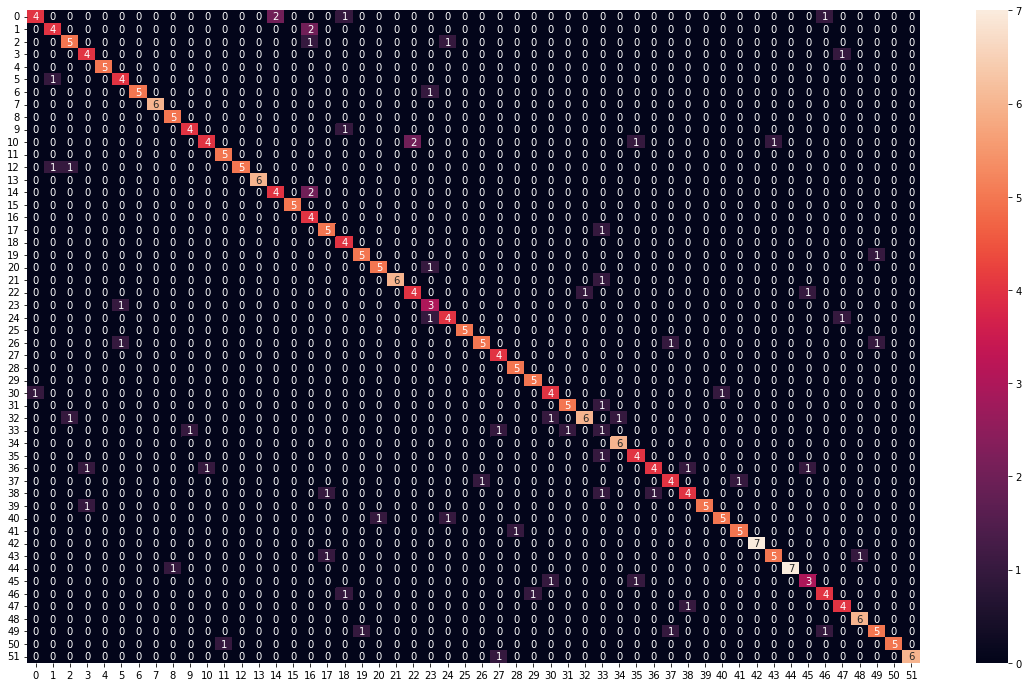

In [145]:
cm = confusion_matrix(y_hat, y_true)
plt.figure(figsize=(20, 12))
sns.heatmap(cm, annot=True)

In [146]:
accuracy_score(y_true, y_hat)

0.782051282051282

In [31]:
model.save('cv_model.h5')

## Model Test

In [7]:
model = tf.keras.models.load_model('cv_model.h5')

In [9]:
actions_map_test, num_of_videos_test = read_labels('dataset_test')

['love', 'forget', 'morning', 'sport', 'hate', 'call', 'holiday', 'hello', 'your', 'where', 'ride', 'month', 'have', 'number', 'speak', 'day', 'understand', 'nice', 'you', 'iam', 'picture', 'good', 'english', 'egypt', 'when', 'play', 'age', 'car', 'my', 'fun', 'na', 'run', 'help', 'excuse', 'meet', 'every', 'year', 'thanks', 'enjoy', 'name', 'read', 'not', 'okay', 'today', 'no', 'book', 'take', 'time', 'yes', 'sorry', 'football', 'what']


In [14]:
sequence_length = 40

sequences_test, labels_test = [], []
for action in actions_map_test.keys():
    for sequence in range(num_of_videos_test[action]):
        window = []
        for frame_num in range(sequence_length):
            frame = np.load(os.path.join("dataset_test", action, str(sequence),f"frame_{frame_num+1}.npz"))['arr_0']
            window.append(frame)
        sequences_test.append(window)
        labels_test.append(actions_map_test[action])

In [15]:
X_test = np.array(sequences_test)

In [21]:
y_test = to_categorical(labels_test).astype(int)

In [22]:
y_test.shape

(306, 52)

In [23]:
y_hat = model.predict(X_test)
y_true = np.argmax(y_test, axis=1).tolist()
y_hat = np.argmax(y_hat, axis=1).tolist()

In [30]:
accuracy_score(y_true, y_hat)

In [28]:
actions_map_test

{'love': 0,
 'forget': 1,
 'morning': 2,
 'sport': 3,
 'hate': 4,
 'call': 5,
 'holiday': 6,
 'hello': 7,
 'your': 8,
 'where': 9,
 'ride': 10,
 'month': 11,
 'have': 12,
 'number': 13,
 'speak': 14,
 'day': 15,
 'understand': 16,
 'nice': 17,
 'you': 18,
 'iam': 19,
 'picture': 20,
 'good': 21,
 'english': 22,
 'egypt': 23,
 'when': 24,
 'play': 25,
 'age': 26,
 'car': 27,
 'my': 28,
 'fun': 29,
 'na': 30,
 'run': 31,
 'help': 32,
 'excuse': 33,
 'meet': 34,
 'every': 35,
 'year': 36,
 'thanks': 37,
 'enjoy': 38,
 'name': 39,
 'read': 40,
 'not': 41,
 'okay': 42,
 'today': 43,
 'no': 44,
 'book': 45,
 'take': 46,
 'time': 47,
 'yes': 48,
 'sorry': 49,
 'football': 50,
 'what': 51}